# Library

In [32]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Apple/train",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Apple/valid",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 8014 files belonging to 4 classes.
==========================Validation Data====================
Found 1943 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/Apple/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/Apple/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 8014 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Apple Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 14s 65ms/step - loss: 0.0020 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.203073%


## Model Dense121 Version 2 Apple Non Augmented

In [6]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DenseNet_model2_Based_Non_Augmented')

In [7]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 52ms/step - loss: 0.0027 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.269655%


## MobileNet V2 Version 1 Apple Non Augmented

In [8]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_MobileNetV2_model1_Based_Non_Augmented')

In [9]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 4s 27ms/step - loss: 0.0050 - accuracy: 0.9995
Accuracy: 99.948531%
Loss: 0.504936%


## MobileNet V2 Version 2 Apple Non Augmented

In [10]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_MobileNetV2_model2_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 4s 24ms/step - loss: 8.7958e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.087958%


## DIY Version 1 Apple Non Augmented

In [12]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DIY_model1_Based_Non_Augmented')

In [13]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 3s 24ms/step - loss: 0.1253 - accuracy: 0.9696
Accuracy: 96.963459%
Loss: 12.530047%


## DIY Version 2 Apple Non Augmented

In [14]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Apple/Non Augmented/Saved Model/Apple_DIY_model2_Based_Non_Augmented')

In [15]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 2s 23ms/step - loss: 0.1356 - accuracy: 0.9789
Accuracy: 97.889858%
Loss: 13.558988%


## Xception Version 1 Apple Non Augmented

In [16]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Apple/Non Augmented/Saved Model/Apple_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 60ms/step - loss: 6.2604e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.062604%


## Xception Version 2 Apple Non Augmented

In [18]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Apple/Non Augmented/Saved Model/Apple_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 57ms/step - loss: 3.3828e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.033828%


# Model Augmented Evaluating

## Model Dense121 Version 1 Apple Augmented

In [20]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DenseNet_model1_Based_Augmented')

In [21]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 49ms/step - loss: 6.5032e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.065032%


## Model Dense121 Version 2 Apple Augmented

In [22]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_DenseNet_model2_Based_Augmented')

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 6s 50ms/step - loss: 6.7528e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.067528%


## MobileNet V2 Version 1 Apple Non Augmented

In [24]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_MobileNetV2_model1_Based_Augmented')

In [25]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 5s 32ms/step - loss: 0.0010 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.102580%


## MobileNet V2 Version 2 Apple Non Augmented

In [26]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Apple/Augmented/Saved Model/Apple_MobileNetV2_model2_Based_Augmented')

In [27]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 3s 26ms/step - loss: 2.9702e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.029702%


## Xception Version 1 Apple Augmented

In [28]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Apple/Augmented/Saved Model/Apple_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 58ms/step - loss: 4.1190e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.041190%


## Xception Version 2 Apple Augmented

In [30]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Apple/Augmented/Saved Model/Apple_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
98/98 [==============================] - 7s 57ms/step - loss: 0.0023 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.233355%


# Compare All

In [34]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1]
}

# Make dataframe of all models, accuracy and loss
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values())), columns =['Model', 'Loss', 'Accuracy'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model      Loss  Accuracy
3     Mobile_Non_Aug2  0.000880  1.000000
6   Xception_Non_Aug1  0.000626  1.000000
7   Xception_Non_Aug2  0.000338  1.000000
8          Dense_Aug1  0.000650  1.000000
9          Dense_Aug2  0.000675  1.000000
10        Mobile_Aug1  0.001026  1.000000
11        Mobile_Aug2  0.000297  1.000000
12      Xception_Aug1  0.000412  1.000000
13      Xception_Aug2  0.002334  1.000000
0      Dense_Non_Aug1  0.002031  0.999485
1      Dense_Non_Aug2  0.002697  0.999485
2     Mobile_Non_Aug1  0.005049  0.999485
5        DIY_Non_Aug2  0.135590  0.978899
4        DIY_Non_Aug1  0.125300  0.969635


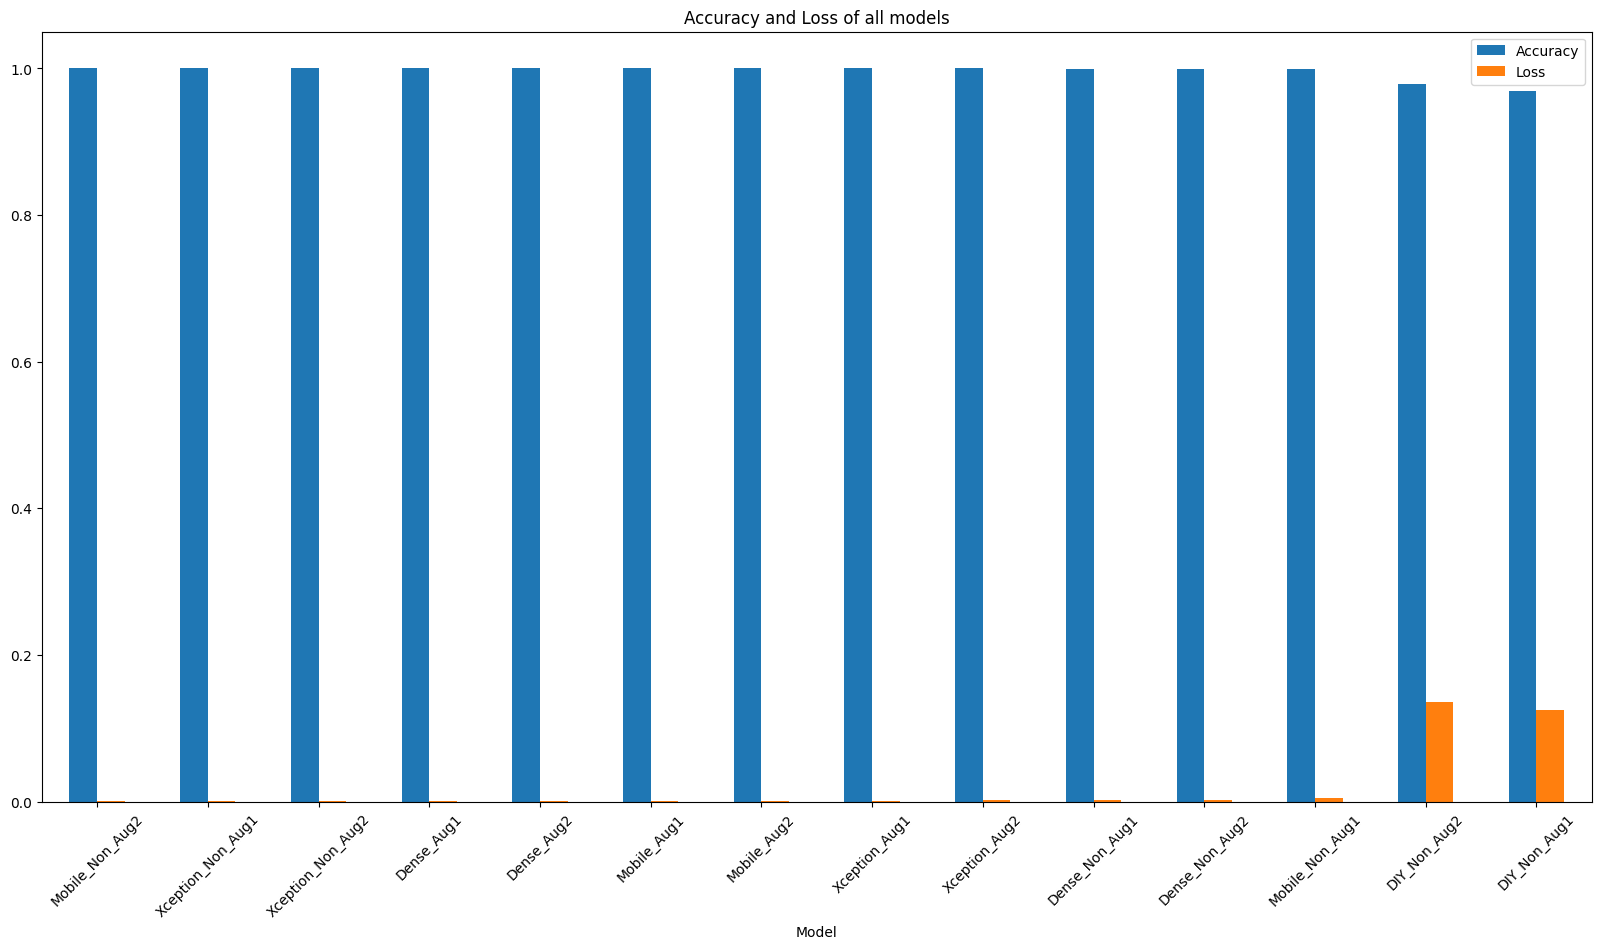

In [37]:
# Make bar chart of all models, accuracy and loss
df.plot.bar(x='Model', y=['Accuracy', 'Loss'], rot=0, figsize=(20,10), title="Accuracy and Loss of all models")
plt.xticks(rotation=45)
plt.show()